# INTRODUÇÃO AOS GUIAS DE ONDAS

Aqui nos ateremos ao argumento opcional `waveguides` da função `optical.medium` que consiste numa lista de guias de onda (`optical.medium.waveguide`).

> `optical.medium.waveguide(geometry = lambda x,y,z: G(x,y,z), delta_n)`
>
> > constrói um guia de onda com a geometria tal que `G(x,y,z)` seja satisfeito que imprime no
> > meio uma variação `delta_n` de índice de refração (que pode ser um número - real ou complexo - ou uma função de (x,y,z)).
>
> parâmetros opcionais:
> 
> > `zi`
> >
> > cota de onde o guia se inicia.
> 
> > `zf`
> >
> > cota de onde o guia se encerra.
>

In [1]:
# muda o diretório para onde está optical/
%cd -q ../../../

# módulo optical.beam: construtores de perfis iniciais
from optical import beam
# importa o método split_step
from optical.beam.propagation import split_step
# importa o método medium da biblioteca optical
from optical import medium
# importa o método waveguide do módulo optical.medium
from optical.medium import waveguide

# módulo numpy: computação geral de matrizes
import numpy as np                  # importa numpy como "np"
# módulo matplotlib.pyplot: construção de representações gráficas
import matplotlib.pyplot as plt     # importa pyplot como "plt"

# construção da partição dos eixos do plano transversal
x = np.linspace(-40.,+40.,500);     # particiona (-40,+40) em 500
y = np.linspace(-40.,+40.,500);     # particiona (-40,+40) em 500

# construção da malha de pontos
X, Y = np.meshgrid(x, y);           # malha de pontos do plano

# criação de um feixe gaussiano
G = beam.create_G(w0 = 10., region = (X, Y));

# construção de um vidro como meio óptico
vidro = medium(
    n0 = 1.5078,
    waveguides = [
        waveguide(
            # com um guia de onda com uma geometria cilíndrica
            geometry = lambda x,y,z: (x**2. + y**2. <= 400.),
            delta_n = 1.0
        )
    ]
);

## PERFIL TRANSVERSAL DA LUZ NUM MEIO COM GUIAS DE ONDA

A informação dos guias de onda fica incorporada ao meio criado, assim podemos fazer o processo de propagação sem preocupação alguma.

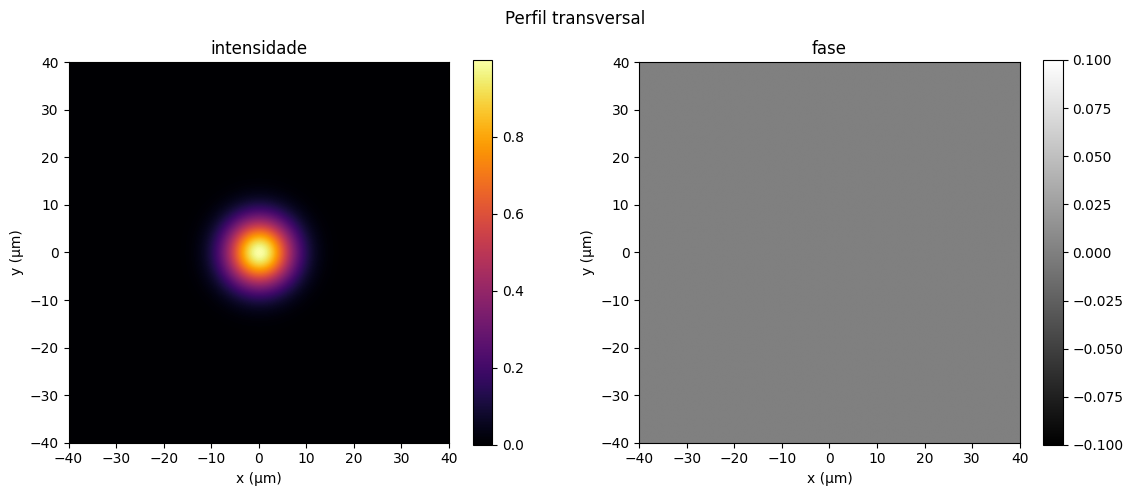

In [2]:
# exibe as imagens geradas em linha
%matplotlib inline

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal')

# criação de gráfico no primeiro quadro
grafico = ax[0].imshow(
    np.abs(G) ** 2,                 # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
)
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico = ax[1].imshow(
    np.angle(G),                    # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'gray'                   # com mapa de cores 'gray'
)
# inserir a barra de cores da fase na figura
fig.colorbar(grafico);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');

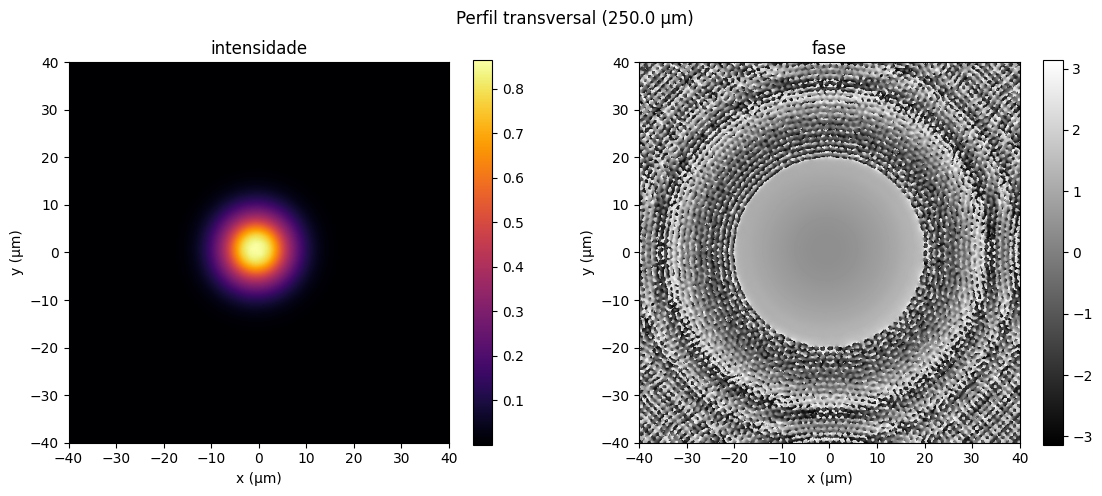

In [3]:
# exibe as imagens geradas em linha
%matplotlib inline

# importa o controle de display do IPython
from IPython.display import display, clear_output

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal (0 μm)')

# criação de gráfico no primeiro quadro
grafico_intensidade = ax[0].imshow(
    np.abs(G) ** 2,                 # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
)
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico_intensidade);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico_fase = ax[1].imshow(
    np.angle(G),                    # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'gray'                   # com mapa de cores 'gray'
)
# inserir a barra de cores da fase na figura
fig.colorbar(grafico_fase);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');

# inicializa o conteúdo mostrado
display(fig);
clear_output(wait = True);
plt.pause(0.5);

# efetuar a estimativa da propagação
dz = np.linspace(0.0, 10.0, 20);    # particiona (0,2.0) em 20
for z in (10.0 + np.arange(0.0,250.0,10.0)):
    G = split_step(
        G,
        wavelength = 640e-3,
        region = (X,Y),
        z = dz,
        medium = vidro
    );
    # atualiza o gráfico de intensidade
    grafico_intensidade.set_data(np.abs(G) ** 2);
    grafico_intensidade.autoscale();
    # atualiza o gráfico de fase
    grafico_fase.set_data(np.angle(G));
    grafico_fase.autoscale();
    # insere o título da figura
    fig.suptitle(f'Perfil transversal ({z} μm)');
    # atualiza o conteúdo mostrado
    display(fig);
    clear_output(wait = True);
    plt.pause(0.5);

plt.show()

## VISUALIZANDO GUIAS DE ONDA

Podemos visualizar os guias de onda de um meio óptico pelo método `optical.medium.visualize` (ao executar é interessante colocar o `%matplotlib` como `widget` para uma maior interatividade).

> `optical.medium.visualize(waveguides,x,y,z)`
>
> > exibe graficamente os guias de onda listados em `waveguides` ao longo dos eixos `x`, `y` e `z`.
>
> parâmetros opcionais:
> 
> > `colors`
> >
> > informa uma lista de cores para colorir os guias.
>

utilizamos aqui 2 pontos no eixo $z$ pela simplicidade da geometria do guia - para guias com geometrias mais complexas, mais pontos devem ser tomados na visualização.

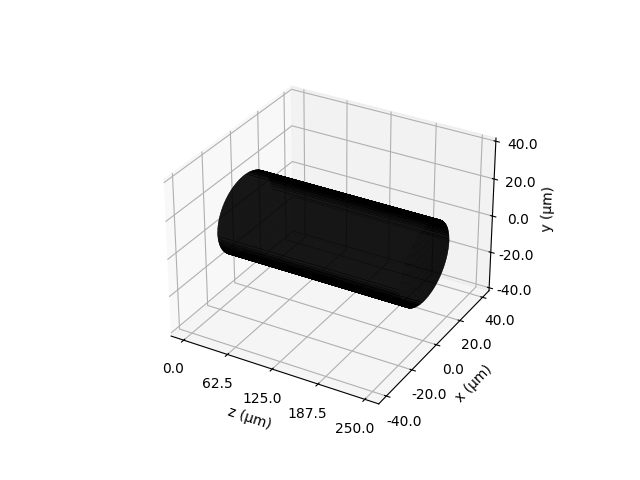

In [4]:
# exibe as imagens geradas de maneira interativa
%matplotlib widget

# importa o método visualize do módulo optical.medium
from optical.medium import visualize

z = np.linspace(0,250,2);
visualize(vidro.waveguides, x,y,z);